In [32]:
from google.colab import drive

In [33]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!nvidia-smi

Thu Apr 21 06:42:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |    390MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [97]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential,models,layers
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from sklearn.decomposition import PCA
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from glob import glob
from PIL import Image

In [66]:
IMAGE_SIZE=[224,224]

In [67]:
img_dir='/content/drive/MyDrive/Br35H-Mask-RCNN'

In [68]:
no_tumor='/content/drive/MyDrive/Br35H-Mask-RCNN/no'

In [69]:
yes_tumor='/content/drive/MyDrive/Br35H-Mask-RCNN/yes'

In [70]:
inseption=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [71]:
for layer in inseption.layers:
  layer.trainable = False

In [72]:
folder_no_tumor=glob('/content/drive/MyDrive/Br35H-Mask-RCNN/no/*')
folder_yes_tumor=glob('/content/drive/MyDrive/Br35H-Mask-RCNN/yes/*')

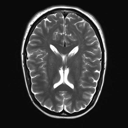

In [73]:
im=Image.open('/content/drive/MyDrive/Br35H-Mask-RCNN/no/No12.jpg').resize((128,128))
im


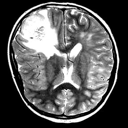

In [74]:
imt=Image.open('/content/drive/MyDrive/Br35H-Mask-RCNN/yes/y0.jpg').resize((128,128))
imt

In [77]:
img_dir='/content/drive/MyDrive/Br35H-Mask-RCNN/'
no_images=os.listdir(img_dir + 'no/')
yes_images=os.listdir(img_dir + 'yes/')

In [46]:
df=folder_no_tumor+folder_yes_tumor

In [81]:
datset=[]
lab=[]
for image_name in no_images:
    image=cv2.imread(img_dir + 'no/' +image_name)
    if image is None:
      break
    else:
      image=Image.fromarray(image,'RGB')
      image=image.resize((64,64))
      datset.append(np.array(image))
      lab.append(0)
for image_name in yes_images:
    image=cv2.imread(img_dir + 'yes/' +image_name)
    if image is None:
      break
    else:
      image=Image.fromarray(image,'RGB')
      image=image.resize((64,64))
      datset.append(np.array(image))
      lab.append(1)

In [82]:
data=np.asarray(datset)
l=np.asarray(lab)

In [83]:
print(data.shape, l.shape)

(3000, 64, 64, 3) (3000,)


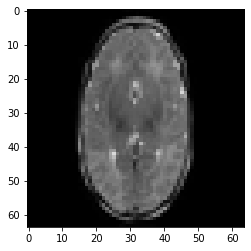

In [84]:
plt.imshow(data[3])

In [85]:
data

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [90]:
model=Sequential([
                     
                     #cnn
                    layers.Conv2D(50,(3,3),activation="relu",input_shape=(64,64,3)),
                    layers.MaxPooling2D((2,2)),
     
                    layers.Conv2D(64,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                    layers.Conv2D(54,(3,3),activation="relu"),
                    layers.MaxPooling2D((2,2)),
    
                     #dense_layer
                     layers.Flatten(),
                     layers.Dense(64,activation="relu"),
                     layers.Dense(2,activation="softmax")


])

In [91]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(data,l,epochs=8)

Epoch 1/8
94/94 [==============================] - 11s 8ms/step - loss: 2.5869 - accuracy: 0.7330
Epoch 2/8
94/94 [==============================] - 1s 6ms/step - loss: 0.3242 - accuracy: 0.8693
Epoch 3/8
94/94 [==============================] - 1s 7ms/step - loss: 0.1950 - accuracy: 0.9273
Epoch 4/8
94/94 [==============================] - 1s 6ms/step - loss: 0.1117 - accuracy: 0.9667
Epoch 5/8
94/94 [==============================] - 1s 6ms/step - loss: 0.0775 - accuracy: 0.9747
Epoch 6/8
94/94 [==============================] - 1s 6ms/step - loss: 0.0492 - accuracy: 0.9833
Epoch 7/8
94/94 [==============================] - 1s 6ms/step - loss: 0.0563 - accuracy: 0.9813
Epoch 8/8
94/94 [==============================] - 1s 6ms/step - loss: 0.0347 - accuracy: 0.9907


In [92]:
pred_set=[]
pred_images=os.listdir(img_dir +'pred/')
for image_name in pred_images:
    image=cv2.imread(img_dir +'pred/'+ image_name)
    image=Image.fromarray(image,'RGB')
    image=image.resize((64,64))
    pred_set.append(np.array(image))
pred=np.asarray(pred_set)

In [93]:
x=model.predict(pred)
max=np.argmax(x,axis=1)

In [94]:
max

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

0


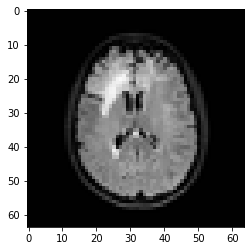

In [95]:
#correctly_predicted
plt.imshow(pred[1])
print(max[1])

0


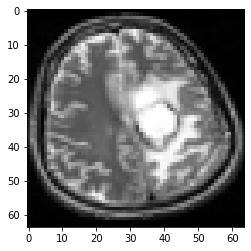

In [96]:
#correctly_predicted
plt.imshow(pred[20])
print(max[1])